In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
#Read the original dataset
df=pd.read_csv("data.csv")

In [62]:
df.head(10)

,productId,Title,userId,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys
5,B000JQALAE,"Greenies Treat-Pak for Dogs, Original",AT66IKVKXSI46,1344211200,"My boxer likes these, but he doesn't get reall...",pet supplies,dogs,treats
6,B000JCCVQU,Orvus W A Paste,AMOEUUDTLP6Q9,1344211200,Use this to wash our show cows. It is great. A...,health personal care,household supplies,household cleaning
7,B000TA8MKG,Be Good My Little Sandbox Play Sets (Pirates A...,ACFT90GFNUQ8H,1344211200,this thing was no larger than a kchen plate an...,toys games,novelty gag toys,unknown
8,B000093A0U,HUGO For Women By HUGO BOSS Eau de Toilette,A3RXOGK8M4GGYM,1344211200,"I love Hugo boss. It's perfect for everyday, i...",beauty,fragrance,men s
9,B000N2Q1V2,Nailtiques After Artificial Treatment,A30VSC032AS7ST,1344211200,I WAS VERY PLEASED WITH THE PRODUCT AND THE PR...,beauty,skin care,hands nails


In [63]:
#get the basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   productId  10000 non-null  object
 1   Title      9995 non-null   object
 2   userId     10000 non-null  object
 3   Time       10000 non-null  int64 
 4   Text       10000 non-null  object
 5   Cat1       10000 non-null  object
 6   Cat2       10000 non-null  object
 7   Cat3       10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [64]:
#Checking distinct values in columns of data
distinct_values = {col: df[col].unique() for col in df.columns}

# Display the distinct values
for col, values in distinct_values.items():
    print(f"Column '{col}' has distinct values: {len(values)}")

Column 'productId' has distinct values: 6865
Column 'Title' has distinct values: 6513
Column 'userId' has distinct values: 9716
Column 'Time' has distinct values: 210
Column 'Text' has distinct values: 9854
Column 'Cat1' has distinct values: 6
Column 'Cat2' has distinct values: 64
Column 'Cat3' has distinct values: 377


In [65]:
#Dropping Null records
df=df.dropna()

In [66]:
df.head(5)

,productId,Title,userId,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys


## Distribution and analysis of classes in Cat1, Cat2 and Cat3

In [11]:
print("cat1: \n",df['Cat1'].unique())
print("number of cat1 categori: " ,len(df['Cat1'].unique()))
print("cat1_count: \n",df['Cat1'].value_counts())

cat1: 
 ['pet supplies' 'health personal care' 'grocery gourmet food' 'toys games'
 'beauty' 'baby products']
number of cat1 categori:  6
cat1_count: 
 health personal care    2987
beauty                  2135
toys games              1759
pet supplies            1576
grocery gourmet food     840
baby products            698
Name: Cat1, dtype: int64


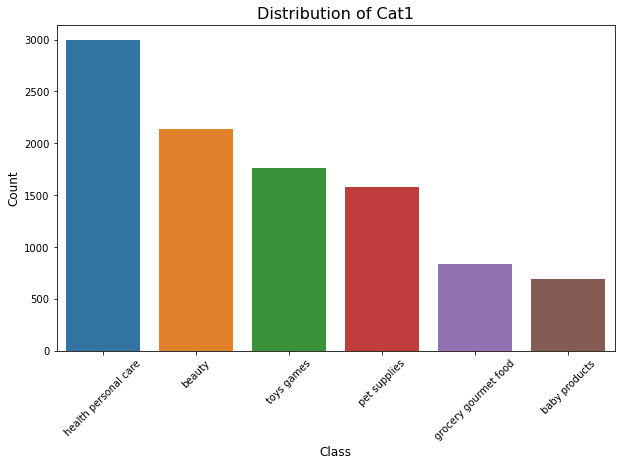

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Cat1', order=df['Cat1'].value_counts().index)

# Add titles and labels
plt.title('Distribution of Cat1', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-ticks if needed
plt.show()

In [12]:
print("cat2: \n",df['Cat2'].unique())
print("number of cat2 categori: " ,len(df['Cat2'].unique()))
print("cat2_count: \n",df['Cat2'].value_counts())

cat2: 
 ['cats' 'bunny rabbit central' 'health care' 'snack food' 'dogs'
 'household supplies' 'novelty gag toys' 'fragrance' 'skin care'
 'personal care' 'nutrition wellness' 'action toy figures'
 'pantry staples' 'makeup' 'stuffed animals plush' 'hair care' 'herbs'
 'nursery' 'bath body' 'diapering' 'baby toddler toys'
 'cooking baking supplies' 'baby child care' 'dolls accessories' 'birds'
 'fish aquatic pets' 'gifts' 'medical supplies equipment'
 'sexual wellness' 'potty training' 'hobbies' 'safety' 'candy chocolate'
 'beverages' 'games' 'arts crafts' 'feeding' 'electronics for kids'
 'strollers' 'tricycles' 'vehicles remote control' 'tools accessories'
 'grown up toys' 'dress up pretend play' 'gear' 'health baby care'
 'breakfast foods' 'building toys' 'sports outdoor play'
 'fresh flowers live indoor plants' 'puzzles' 'pregnancy maternity'
 'bathing skin care' 'learning education' 'car seats accessories'
 'sauces dips' 'small animals' 'dairy eggs' 'breads bakery'
 'gourmet gifts'

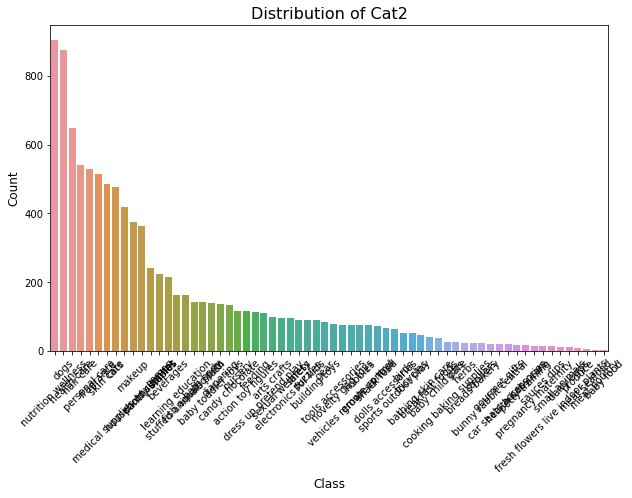

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Cat2', order=df['Cat2'].value_counts().index)

# Add titles and labels
plt.title('Distribution of Cat2', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-ticks if needed
plt.show()

In [13]:
print("number of cat3 categories: " ,len(df['Cat3'].unique()))
print("cat3_count: \n",df['Cat3'].value_counts())

number of cat3 categories:  377
cat3_count: 
 vitamins supplements     665
unknown                  487
women s                  286
shaving hair removal     280
face                     262
                        ... 
children s                 1
die cast toy vehicles      1
cheese gifts               1
fruits                     1
beanbags foot bags         1
Name: Cat3, Length: 377, dtype: int64


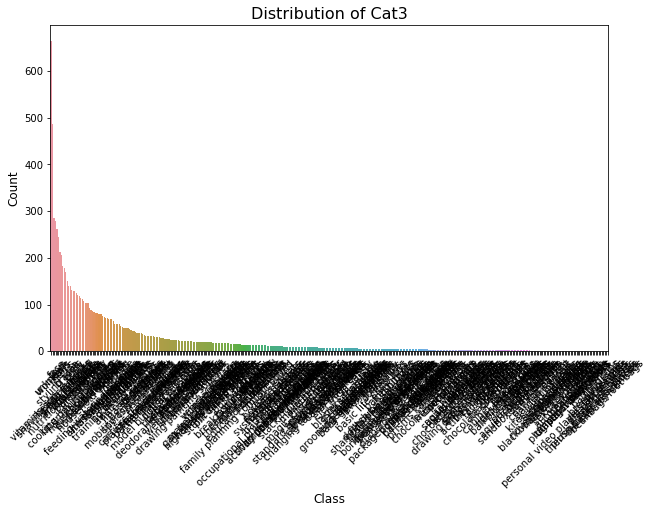

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Cat3', order=df['Cat3'].value_counts().index)

# Add titles and labels
plt.title('Distribution of Cat3', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-ticks if needed
plt.show()


## Splitting the data in training, validation and testing set

In [16]:
# Assume df is your DataFrame that you want to split
df_train, df_test_val = train_test_split(df, test_size=0.25, random_state=42, stratify=df['Cat2'])

In [19]:
df_val, df_test = train_test_split(df_test_val, test_size=0.40, random_state=42)


In [24]:
print(df_train['Cat1'].value_counts())
print(df_val['Cat1'].value_counts())
print(df_test['Cat1'].value_counts())

health personal care    2239
beauty                  1600
toys games              1319
pet supplies            1181
grocery gourmet food     632
baby products            525
Name: Cat1, dtype: int64
health personal care    457
beauty                  315
toys games              253
pet supplies            237
grocery gourmet food    130
baby products           107
Name: Cat1, dtype: int64
health personal care    291
beauty                  220
toys games              187
pet supplies            158
grocery gourmet food     78
baby products            66
Name: Cat1, dtype: int64


In [30]:
print(len(df_train['Cat2'].unique()))
print(len(df_val['Cat2'].unique()))
print(len(df_test['Cat2'].unique()))

64
62
60


In [31]:
print(len(df_train['Cat3'].unique()))
print(len(df_val['Cat3'].unique()))
print(len(df_test['Cat3'].unique()))

360
238
226


## Cleaning and removing noise from data

In [32]:
def clean_text(sentence):
    '''
    Take input text, remove url, email, and remove non-alphabetical characters
    :param sentence:
    :return:
    '''
    url_regex = r"(?:http|ftp|https):\/\/(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])?"
    email_regex = r"[\w\.-]+@[\w\.-]+\.\w+"
    number_regex = r"[-+]?(([0-9]{1,3}(,[0-9]{3,3})+)|([0-9]+[\.][0-9]+)|([0-9]+(\-[0-9]+)+)|([0-9]+))"
    
    sentence = sentence.lower()
    sentence = re.sub(email_regex, "email", sentence)
    sentence = re.sub(url_regex, "url", sentence)
    sentence = re.sub(number_regex, "number", sentence)
    
    sentence = re.sub("[^a-zA-Z\\s]", "",sentence)

    return sentence


In [33]:
df_train['clean_Title']=df_train['Title'].apply(lambda x: clean_text(x))
df_train['clean_Text']=df_train['Text'].apply(lambda x: clean_text(x))

df_val['clean_Title']=df_val['Title'].apply(lambda x: clean_text(x))
df_val['clean_Text']=df_val['Text'].apply(lambda x: clean_text(x))

df_test['clean_Title']=df_test['Title'].apply(lambda x: clean_text(x))
df_test['clean_Text']=df_test['Text'].apply(lambda x: clean_text(x))

/Users/apple/opt/anaconda3/envs/tfpyspark/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/apple/opt/anaconda3/envs/tfpyspark/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/apple/opt/anaconda3/envs/tfpyspark/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

## Combining Title and Text columns
- after cleaning the data, combine clean_Title and clean_Text columns together in all training, validation and test data
- I believe, it could be very useful while training to capture important information for predicting Hierarchical categories

In [35]:
df_train['combined_text'] = 'the name of the product is '+df_train['clean_Title']+' the review of the product given by the user after purchasing it is ' + df_train['clean_Text']
df_val['combined_text'] = 'the name of the product is '+df_val['clean_Title']+' the review of the product given by the user after purchasing it is ' + df_val['clean_Text']
df_test['combined_text'] = 'the name of the product is '+df_test['clean_Title']+' the review of the product given by the user after purchasing it is ' + df_test['clean_Text']


/Users/apple/opt/anaconda3/envs/tfpyspark/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/apple/opt/anaconda3/envs/tfpyspark/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/apple/opt/anaconda3/envs/tfpyspark/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [58]:
df_train.count()

productId        7496
Title            7496
userId           7496
Time             7496
Text             7496
Cat1             7496
Cat2             7496
Cat3             7496
clean_Title      7496
clean_Text       7496
combined_text    7496
dtype: int64

In [59]:
df_val.count()

productId        1499
Title            1499
userId           1499
Time             1499
Text             1499
Cat1             1499
Cat2             1499
Cat3             1499
clean_Title      1499
clean_Text       1499
combined_text    1499
dtype: int64

In [60]:
df_test.count()

productId        1000
Title            1000
userId           1000
Time             1000
Text             1000
Cat1             1000
Cat2             1000
Cat3             1000
clean_Title      1000
clean_Text       1000
combined_text    1000
dtype: int64

In [36]:
df_train.head(5)

,productId,Title,userId,Time,Text,Cat1,Cat2,Cat3,clean_Title,clean_Text,combined_text
1315,B000EPNE3Q,Remington NEDH-2500 Titanium Personal Trimmer ...,A21FO8HXJECL08,1348790400,I purchased my Remington NEDH-2500 Titanium Pe...,health personal care,personal care,shaving hair removal,remington nedhnumber titanium personal trimmer...,i purchased my remington nedhnumber titanium p...,the name of the product is remington nedhnumbe...
583,B000MKU2YC,McDavid Universal Back Support,A1J14LNFQ7O80T,1346198400,Bought one for my dad as his birthday gift. Hi...,health personal care,medical supplies equipment,braces,mcdavid universal back support,bought one for my dad as his birthday gift his...,the name of the product is mcdavid universal b...
6318,B0002Q0VD8,EggCrate Foam Mattress Pad - Thickness 3 inches,A2N2SWFHDYMPK2,1357430400,"After several days, it remains unexpanded and ...",health personal care,medical supplies equipment,mobility aids equipment,eggcrate foam mattress pad thickness number i...,after several days it remains unexpanded and u...,the name of the product is eggcrate foam mattr...
8415,B00005JS5C,Panasonic ES246AC Bikini Shaper and Trimmer,AAKLRYT8LVRFT,1359763200,I bought this product based on the good review...,health personal care,personal care,shaving hair removal,panasonic esnumberac bikini shaper and trimmer,i bought this product based on the good review...,the name of the product is panasonic esnumbera...
925,B00006IA8O,3M Scotchgard Fabric Protector,A67YO0RRC61AM,1347321600,I ordered three cans in order to treat cushion...,health personal care,household supplies,cleaning tools,numberm scotchgard fabric protector,i ordered three cans in order to treat cushion...,the name of the product is numberm scotchgard ...


### Creating master category data using original data to get all the Cat1, Cat2 and Cat3 list, 
- we will use this master category dataframe to get all classes of a Cat2 or Cat3 w.r.t Cat1, Cat2 category

In [39]:
master_category_df=df[['Cat1','Cat2','Cat3']]

## saving the train, val and test data

In [37]:
df_train.to_csv("final/train_data.csv")
df_val.to_csv("final/validation_data.csv")
df_test.to_csv("final/test_data.csv")

In [40]:
master_category_df.to_csv("final/master_category_data.csv")